## SVM Results

     pcost       dcost       gap    pres   dres
 0: -4.3382e+01 -3.1525e+02  3e+03  5e+00  1e-15
 1: -2.1150e+01 -2.2250e+02  3e+02  1e-01  9e-16
 2: -2.1958e+01 -4.8334e+01  3e+01  1e-02  6e-16
 3: -2.6242e+01 -3.5044e+01  9e+00  4e-03  5e-16
 4: -2.7639e+01 -3.1933e+01  4e+00  2e-03  4e-16
 5: -2.8673e+01 -2.9862e+01  1e+00  3e-04  5e-16
 6: -2.8988e+01 -2.9314e+01  3e-01  5e-05  5e-16
 7: -2.9101e+01 -2.9150e+01  5e-02  5e-06  6e-16
 8: -2.9122e+01 -2.9123e+01  1e-03  1e-07  6e-16
 9: -2.9122e+01 -2.9122e+01  4e-05  4e-09  6e-16
10: -2.9122e+01 -2.9122e+01  4e-07  4e-11  6e-16
Optimal solution found.
Accuracy (svc): 0.9375
Accuracy (svm): 0.95
Accuracy (svmgd): 0.9


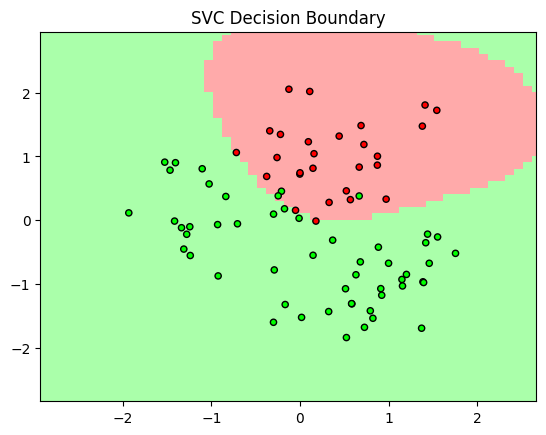

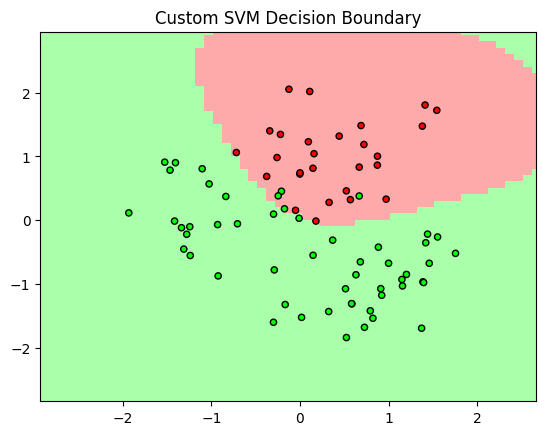

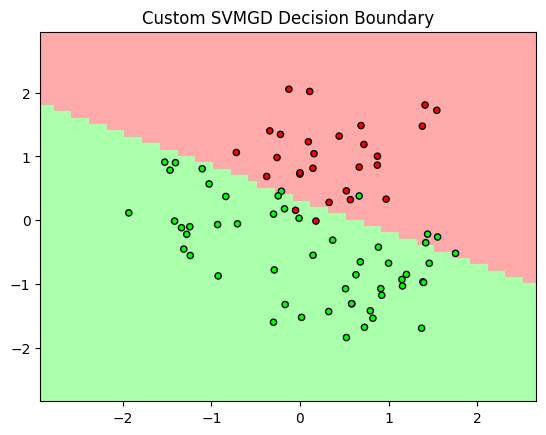

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from svm import SVM, SVMGD, plot_decision_boundary

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X, y = make_blobs(n_samples=400, random_state=0)
y = np.where(y == 0, -1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate and train SVM classifier
svm = SVM(kernel='rbf', gamma=0.5, C=0.5)
svm.fit(X_train, y_train)

svc = SVC(kernel='rbf', gamma=0.5, C=0.5)
svc.fit(X_train, y_train)

svmgd = SVMGD(learning_rate=0.01, n_iterations=3000)
svmgd.fit(X_train, y_train)

# Predict
predictions_svc = svc.predict(X_test)
print("Accuracy (svc):", accuracy(y_test, predictions_svc))

# Predict
predictions_svm = svm.predict(X_test)
print("Accuracy (svm):", accuracy(y_test, predictions_svm))

# Predict
predictions_svmgd = svmgd.predict(X_test)
print("Accuracy (svmgd):", accuracy(y_test, predictions_svmgd))

plt.figure(1)
plot_decision_boundary(X_test, y_test, svc, title='SVC Decision Boundary')

plt.figure(2)
plot_decision_boundary(X_test, y_test, svm, title='Custom SVM Decision Boundary')

plt.figure(3)
plot_decision_boundary(X_test, y_test, svmgd, title='Custom SVMGD Decision Boundary')
plt.show()
